# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())


# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Create a dataframe to store the data
city_df = pd.DataFrame({"City": [city.capitalize() for city in cities], "Country": countries, 
                        "Latitude": "", "Longitude": "", "Temperature (F)": "", 
                        "Humidity (%)": "", "Wind Speed (mph)": "", "Cloudiness (%)": ""})

city_df.head()

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Wind Speed (mph),Cloudiness (%)
0,Kapaa,US,,,,,,
1,Jamestown,SH,,,,,,
2,Thompson,CA,,,,,,
3,Auki,SB,,,,,,
4,Port alfred,ZA,,,,,,


In [5]:
# keeps count of those cities whose weather information is successfully obtained
city_count = 0
api_call_count = 1

# For each city in the dataframe, do the following: 
for index,row in city_df.iterrows():
    city_name = row["City"]
    country_id = row["Country"]
    
    # create a dictionary to contain the query parameters
    search_parameters = {
        "q": str(city_name)+","+str(country_id),
        "units": "imperial",
        "mode": "json",
        "appid": weather_api_key
    }
    
    #api call for all cities 
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    response = requests.get(base_url, params = search_parameters).json()
    
    try:
        city_df.loc[index,"Latitude"] = response["coord"]["lat"]
        city_df.loc[index,"Longitude"] = response["coord"]["lon"]
        city_df.loc[index,"Temperature (F)"] = response["main"]["temp_max"]
        city_df.loc[index,"Humidity (%)"] = response["main"]["humidity"]
        city_df.loc[index,"Wind Speed (mph)"] = response["wind"]["speed"]
        city_df.loc[index,"Cloudiness (%)"] = response["clouds"]["all"]

        #print log for each city
        print(f"Processing Record {api_call_count} | {city_name}" )
        
        city_count = city_count + 1 
    
    except KeyError:
        city_df.loc[index,"Latitude"] = np.nan
        city_df.loc[index,"Longitude"] = np.nan
        city_df.loc[index,"Temperature (F)"] = np.nan
        city_df.loc[index,"Humidity (%)"] = np.nan
        city_df.loc[index,"Cloudiness (%)"] = np.nan
        city_df.loc[index,"Wind Speed (mph)"] = np.nan

        print(f"Missing weather information for city {city_name}")
    api_call_count = api_call_count + 1        

        
print(f"Processing successfully completed. Retrieved weather information for {city_count} cities")


Processing Record 1 | Kapaa
Processing Record 2 | Jamestown
Processing Record 3 | Thompson
Processing Record 4 | Auki
Processing Record 5 | Port alfred
Processing Record 6 | Ballina
Missing weather information for city Belushya guba
Processing Record 8 | Ocean city
Missing weather information for city Sentyabrskiy
Missing weather information for city Airai
Processing Record 11 | Hermanus
Processing Record 12 | Ayagoz
Missing weather information for city Amderma
Processing Record 14 | Amahai
Missing weather information for city Chengmai
Processing Record 16 | Kahului
Processing Record 17 | Hobart
Processing Record 18 | Longyearbyen
Processing Record 19 | Sidhauli
Processing Record 20 | Mar del plata
Processing Record 21 | Dikson
Processing Record 22 | Coahuayana
Processing Record 23 | Egvekinot
Missing weather information for city Illoqqortoormiut
Processing Record 25 | Sterlibashevo
Processing Record 26 | Jiaozhou
Processing Record 27 | Presidente medici
Processing Record 28 | Bangkal


Processing Record 240 | Carupano
Processing Record 241 | Axim
Processing Record 242 | Ancud
Processing Record 243 | Zhezkazgan
Missing weather information for city Chagda
Missing weather information for city Nizhneyansk
Processing Record 246 | Tigil
Processing Record 247 | Praia da vitoria
Processing Record 248 | Nago
Processing Record 249 | Semypolky
Processing Record 250 | Telimele
Processing Record 251 | Sao jose da coroa grande
Processing Record 252 | Morgan city
Processing Record 253 | Nosy varika
Processing Record 254 | Amarastii de sus
Processing Record 255 | Nouadhibou
Processing Record 256 | Verkhnyaya inta
Processing Record 257 | Sorland
Processing Record 258 | Deltona
Missing weather information for city Lasa
Processing Record 260 | Punta cardon
Processing Record 261 | Varhaug
Processing Record 262 | Zarate
Processing Record 263 | Roma
Processing Record 264 | Kiruna
Processing Record 265 | Inuvik
Processing Record 266 | Grindavik
Processing Record 267 | Talnakh
Processing Re

Processing Record 476 | Sangar
Processing Record 477 | Songjianghe
Processing Record 478 | Bandar
Processing Record 479 | Tiznit
Missing weather information for city Karaton
Processing Record 481 | Ukhta
Processing Record 482 | Farafangana
Processing Record 483 | College
Processing Record 484 | Brownwood
Processing Record 485 | Ende
Processing Record 486 | Lerwick
Processing Record 487 | Xuanwu
Processing Record 488 | Maloy
Processing Record 489 | Strelka
Processing Record 490 | Mahibadhoo
Missing weather information for city Bara
Processing Record 492 | Touros
Processing Record 493 | Khandagayty
Processing Record 494 | Gigmoto
Processing Record 495 | Kashi
Processing Record 496 | Rundu
Processing Record 497 | Port blair
Processing Record 498 | Najran
Processing Record 499 | Darhan
Processing Record 500 | Iraucuba
Processing Record 501 | Anadyr
Processing Record 502 | Bonfim
Processing Record 503 | Palu
Processing Record 504 | Calabozo
Processing Record 505 | Magaria
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# remove missing data
city_df = city_df.dropna()

# displays the count of unique cities
print(f"Retrieved weather information for {city_count} cities.")

Retrieved weather information for 553 cities.


In [7]:
# display the dataframe
city_df.head()

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Wind Speed (mph),Cloudiness (%)
0,Kapaa,US,22.08,-159.32,82.4,69,12.75,20
1,Jamestown,SH,-15.94,-5.72,62.28,80,21.34,1
2,Thompson,CA,55.74,-97.86,62.6,82,2.24,75
3,Auki,SB,-8.77,160.7,78.98,83,5.39,99
4,Port alfred,ZA,-33.59,26.89,60.1,71,14.67,0


In [8]:
# save output csv
output_data_file = "output_data/cities.csv"
city_df.to_csv(output_data_file, index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# check max value of humidity
max(city_df["Humidity (%)"])

100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

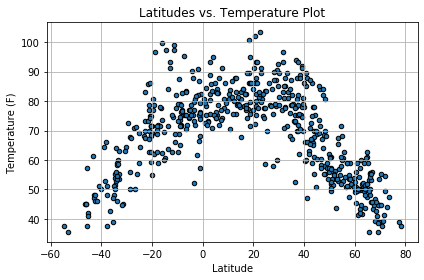

In [10]:
city_df.plot.scatter(x="Latitude", y="Temperature (F)", marker="o", grid = True, edgecolor = "black")
# set title and labels
plt.title("Latitudes vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
# save graph 
plt.tight_layout()
plt.savefig("Images/lat_vs_temp.png")
# print plot
plt.show()

## Latitude vs. Humidity Plot

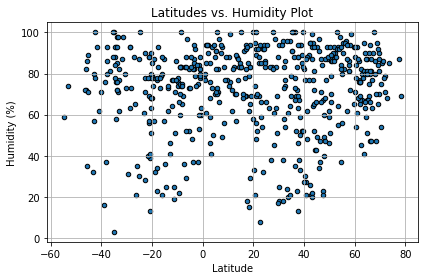

In [11]:
city_df.plot.scatter(x="Latitude", y="Humidity (%)", marker="o", grid = True, edgecolor = "black")
# set title and labels
plt.title("Latitudes vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# save graph 
plt.tight_layout()
plt.savefig("Images/lat_vs_humi.png")
# print plot
plt.show()

## Latitude vs. Cloudiness Plot

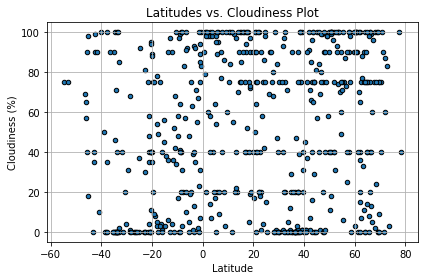

In [12]:
city_df.plot.scatter(x="Latitude", y="Cloudiness (%)", marker="o", grid = True, edgecolor = "black")
# set title and labels
plt.title("Latitudes vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# save graph 
plt.tight_layout()
plt.savefig("Images/lat_vs_cloud.png")
# print plot
plt.show()

## Latitude vs. Wind Speed Plot

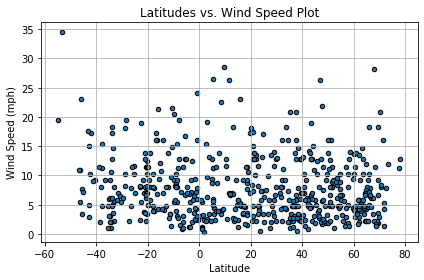

In [13]:
city_df.plot.scatter(x="Latitude", y="Wind Speed (mph)", marker="o", grid = True, edgecolor = "black")
# set title and labels
plt.title("Latitudes vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# save graph 
plt.tight_layout()
plt.savefig("Images/lat_vs_wind.png")
# print plot
plt.show()

## Linear Regression

In [14]:
# separate northern and southern hemisphere
northern_df = city_df.loc[city_df["Latitude"] >= 0]
southern_df = city_df.loc[city_df["Latitude"] < 0]

In [15]:
northern_lat = northern_df["Latitude"].astype(float)
northern_temp = northern_df["Temperature (F)"].astype(float)
northern_humidity = northern_df["Humidity (%)"].astype(float)
northern_cloud = northern_df["Cloudiness (%)"].astype(float)
northern_wind = northern_df["Wind Speed (mph)"].astype(float)
southern_lat = southern_df["Latitude"].astype(float)
southern_temp = southern_df["Temperature (F)"].astype(float)
southern_humidity = southern_df["Humidity (%)"].astype(float)
southern_cloud = southern_df["Cloudiness (%)"].astype(float)
southern_wind = southern_df["Wind Speed (mph)"].astype(float)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

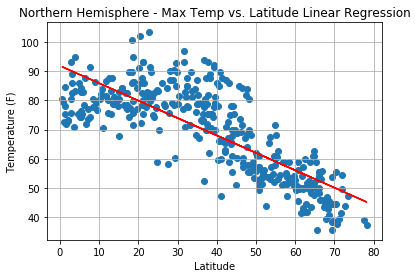

The linear regression equation is y = -0.6x + 91.84.



In [16]:
# compute the linear regression equation and add regression line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat,northern_temp)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_lat,northern_temp)
plt.plot(northern_lat,regress_values,"r-")
plt.grid(True)

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Images/regression_northern_temp_vs_lat.png")
plt.show() 

print(f"The linear regression equation is {line_eq}.\n")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

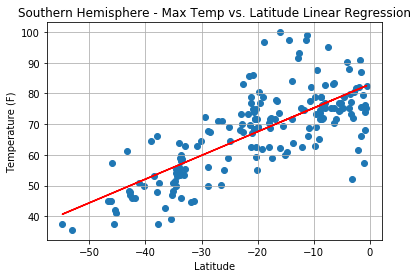

The linear regression equation is y = 0.77x + 83.0.



In [17]:
# compute the linear regression equation and add regression line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat,southern_temp)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_lat,southern_temp)
plt.plot(southern_lat,regress_values,"r-")
plt.grid(True)

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Images/regression_southern_temp_vs_lat.png")
plt.show() 

print(f"The linear regression equation is {line_eq}.\n")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

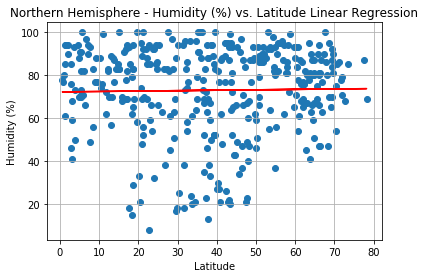

The linear regression equation is y = 0.02x + 72.24.



In [18]:
# compute the linear regression equation and add regression line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat,northern_humidity)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_lat,northern_humidity)
plt.plot(northern_lat,regress_values,"r-")
plt.grid(True)

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Images/regression_northern_humidity_vs_lat.png")
plt.show() 

print(f"The linear regression equation is {line_eq}.\n")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

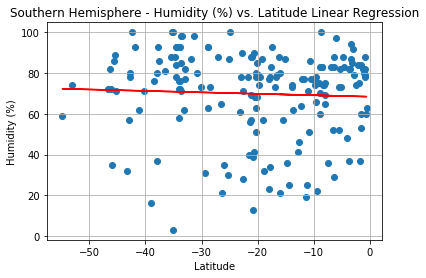

The linear regression equation is y = -0.07x + 68.38.



In [19]:
# compute the linear regression equation and add regression line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat,southern_humidity)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_lat,southern_humidity)
plt.plot(southern_lat,regress_values,"r-")
plt.grid(True)

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Images/regression_southern_humidity_vs_lat.png")
plt.show() 

print(f"The linear regression equation is {line_eq}.\n")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

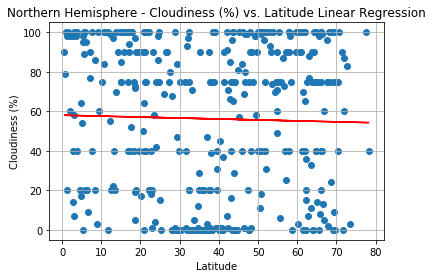

The linear regression equation is y = -0.05x + 58.04.



In [20]:
# compute the linear regression equation and add regression line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat,northern_cloud)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_lat,northern_cloud)
plt.plot(northern_lat,regress_values,"r-")
plt.grid(True)

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Images/regression_northern_cloud_vs_lat.png")
plt.show() 

print(f"The linear regression equation is {line_eq}.\n")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

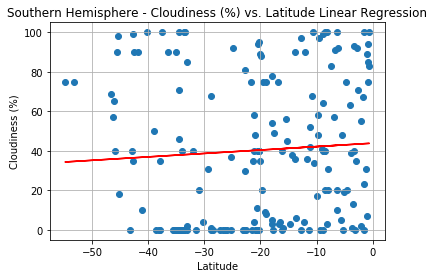

The linear regression equation is y = 0.17x + 43.89.



In [21]:
# compute the linear regression equation and add regression line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat,southern_cloud)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_lat,southern_cloud)
plt.plot(southern_lat,regress_values,"r-")
plt.grid(True)

plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Images/regression_southern_cloud_vs_lat.png")
plt.show() 

print(f"The linear regression equation is {line_eq}.\n")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

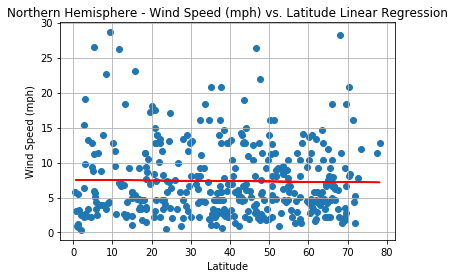

The linear regression equation is y = -0.0x + 7.53.



In [22]:
# compute the linear regression equation and add regression line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat,northern_wind)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_lat,northern_wind)
plt.plot(northern_lat,regress_values,"r-")
plt.grid(True)

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Images/regression_northern_wind_vs_lat.png")
plt.show() 

print(f"The linear regression equation is {line_eq}.\n")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

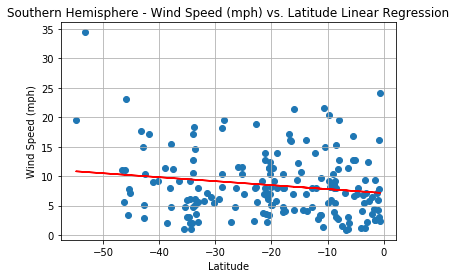

The linear regression equation is y = -0.07x + 7.12.



In [23]:
# compute the linear regression equation and add regression line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat,southern_wind)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_lat,southern_wind)
plt.plot(southern_lat,regress_values,"r-")
plt.grid(True)

plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Images/regression_southern_wind_vs_lat.png")
plt.show() 

print(f"The linear regression equation is {line_eq}.\n")